In [25]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy.interpolate import Rbf
from scipy.stats import linregress

In [2]:
dbf_path = 'C:/st/russian stations.dbf'
gdf1 = gpd.read_file(dbf_path, encoding = 'cp1251').set_crs(epsg = 4326)

In [3]:
shp_region_path = 'C:/st/RFobldd.shp'
gdf2 = gpd.read_file(shp_region_path, encoding = 'cp1251').set_crs(epsg = 4326)

In [4]:
region = 'Респ. Саха (Якутия)'
filt_df_region = gdf1[gdf1['OWN2'] == region]
filt_df_region

STNNUM              NAME  UGMS   SNUM    LAT     LON  FOLDN    OWN1  \
1545  5592491          Нагорный    24  30493  55.97  124.88      0  Россия   
1565  5602761             Сутам    24  31201  56.00  127.60      0  Россия   
1624  5633111              Токо    24  31137  56.28  131.13      0  Россия   
1694  5672471          Нерюнгри    24  30396  56.70  124.70      0  Россия   
1725  5692491           Чульман    24  30393  56.83  124.87      1  Россия   
...       ...               ...   ...    ...    ...     ...    ...     ...   
2795  7413541     Столбовой,ос.    24  21537  74.10  135.40      1  Россия   
2798  7473891  Пролив Санникова    24  21535  74.67  138.90      1  Россия   
2799  7494211       Земля Бунге    24  21541  74.90  142.10      0  Россия   
2803  7603791       О.Котельный    24  21432  76.00  137.87      1  Россия   
2804  7625281      Остров Жохов    24  21358  76.20  152.80      1  Россия   

                     OWN2  TM1_SR0  ...  SUT77  TMM1  TMS  TMSS  TMSM    BSUT  \
1545  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1936.0   
1565  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1979.0   
1624  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1962.0   
1694  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1980.0   
1725  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1936.0   
...                   ...      ...  ...    ...   ...  ...   ...   ...     ...   
2795  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1978.0   
2798  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1959.0   
2799  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1959.0   
2803  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1936.0   
2804  Респ. Саха (Якутия)        0  ...      1     1    1     1     1  1956.0   

        ESUT    BSRO    ESRO                    geometry  
1545  2004.0  1936.0  2004.0  POINT (124.88000 55.97000)  
1565  1988.0  1979.0  1988.0  POINT (127.60000 56.00000)  
1624  2004.0  1959.0  2004.0  POINT (131.13000 56.28000)  
1694  1990.0  1980.0  1990.0  POINT (124.70000 56.70000)  
1725  2004.0  1936.0  2004.0  POINT (124.87000 56.83000)  
...      ...     ...     ...                         ...  
2795  1992.0  1978.0  1992.0  POINT (135.40000 74.10000)  
2798  2004.0  1959.0  2004.0  POINT (138.90000 74.67000)  
2799  1987.0  1959.0  1987.0  POINT (142.10000 74.90000)  
2803  2004.0  1936.0  2004.0  POINT (137.87000 76.00000)  
2804  1993.0  1956.0  1993.0  POINT (152.80000 76.20000)  

[172 rows x 25 columns]

Text(0.5, 1.0, 'Размещение метеостанций на территории РФ')

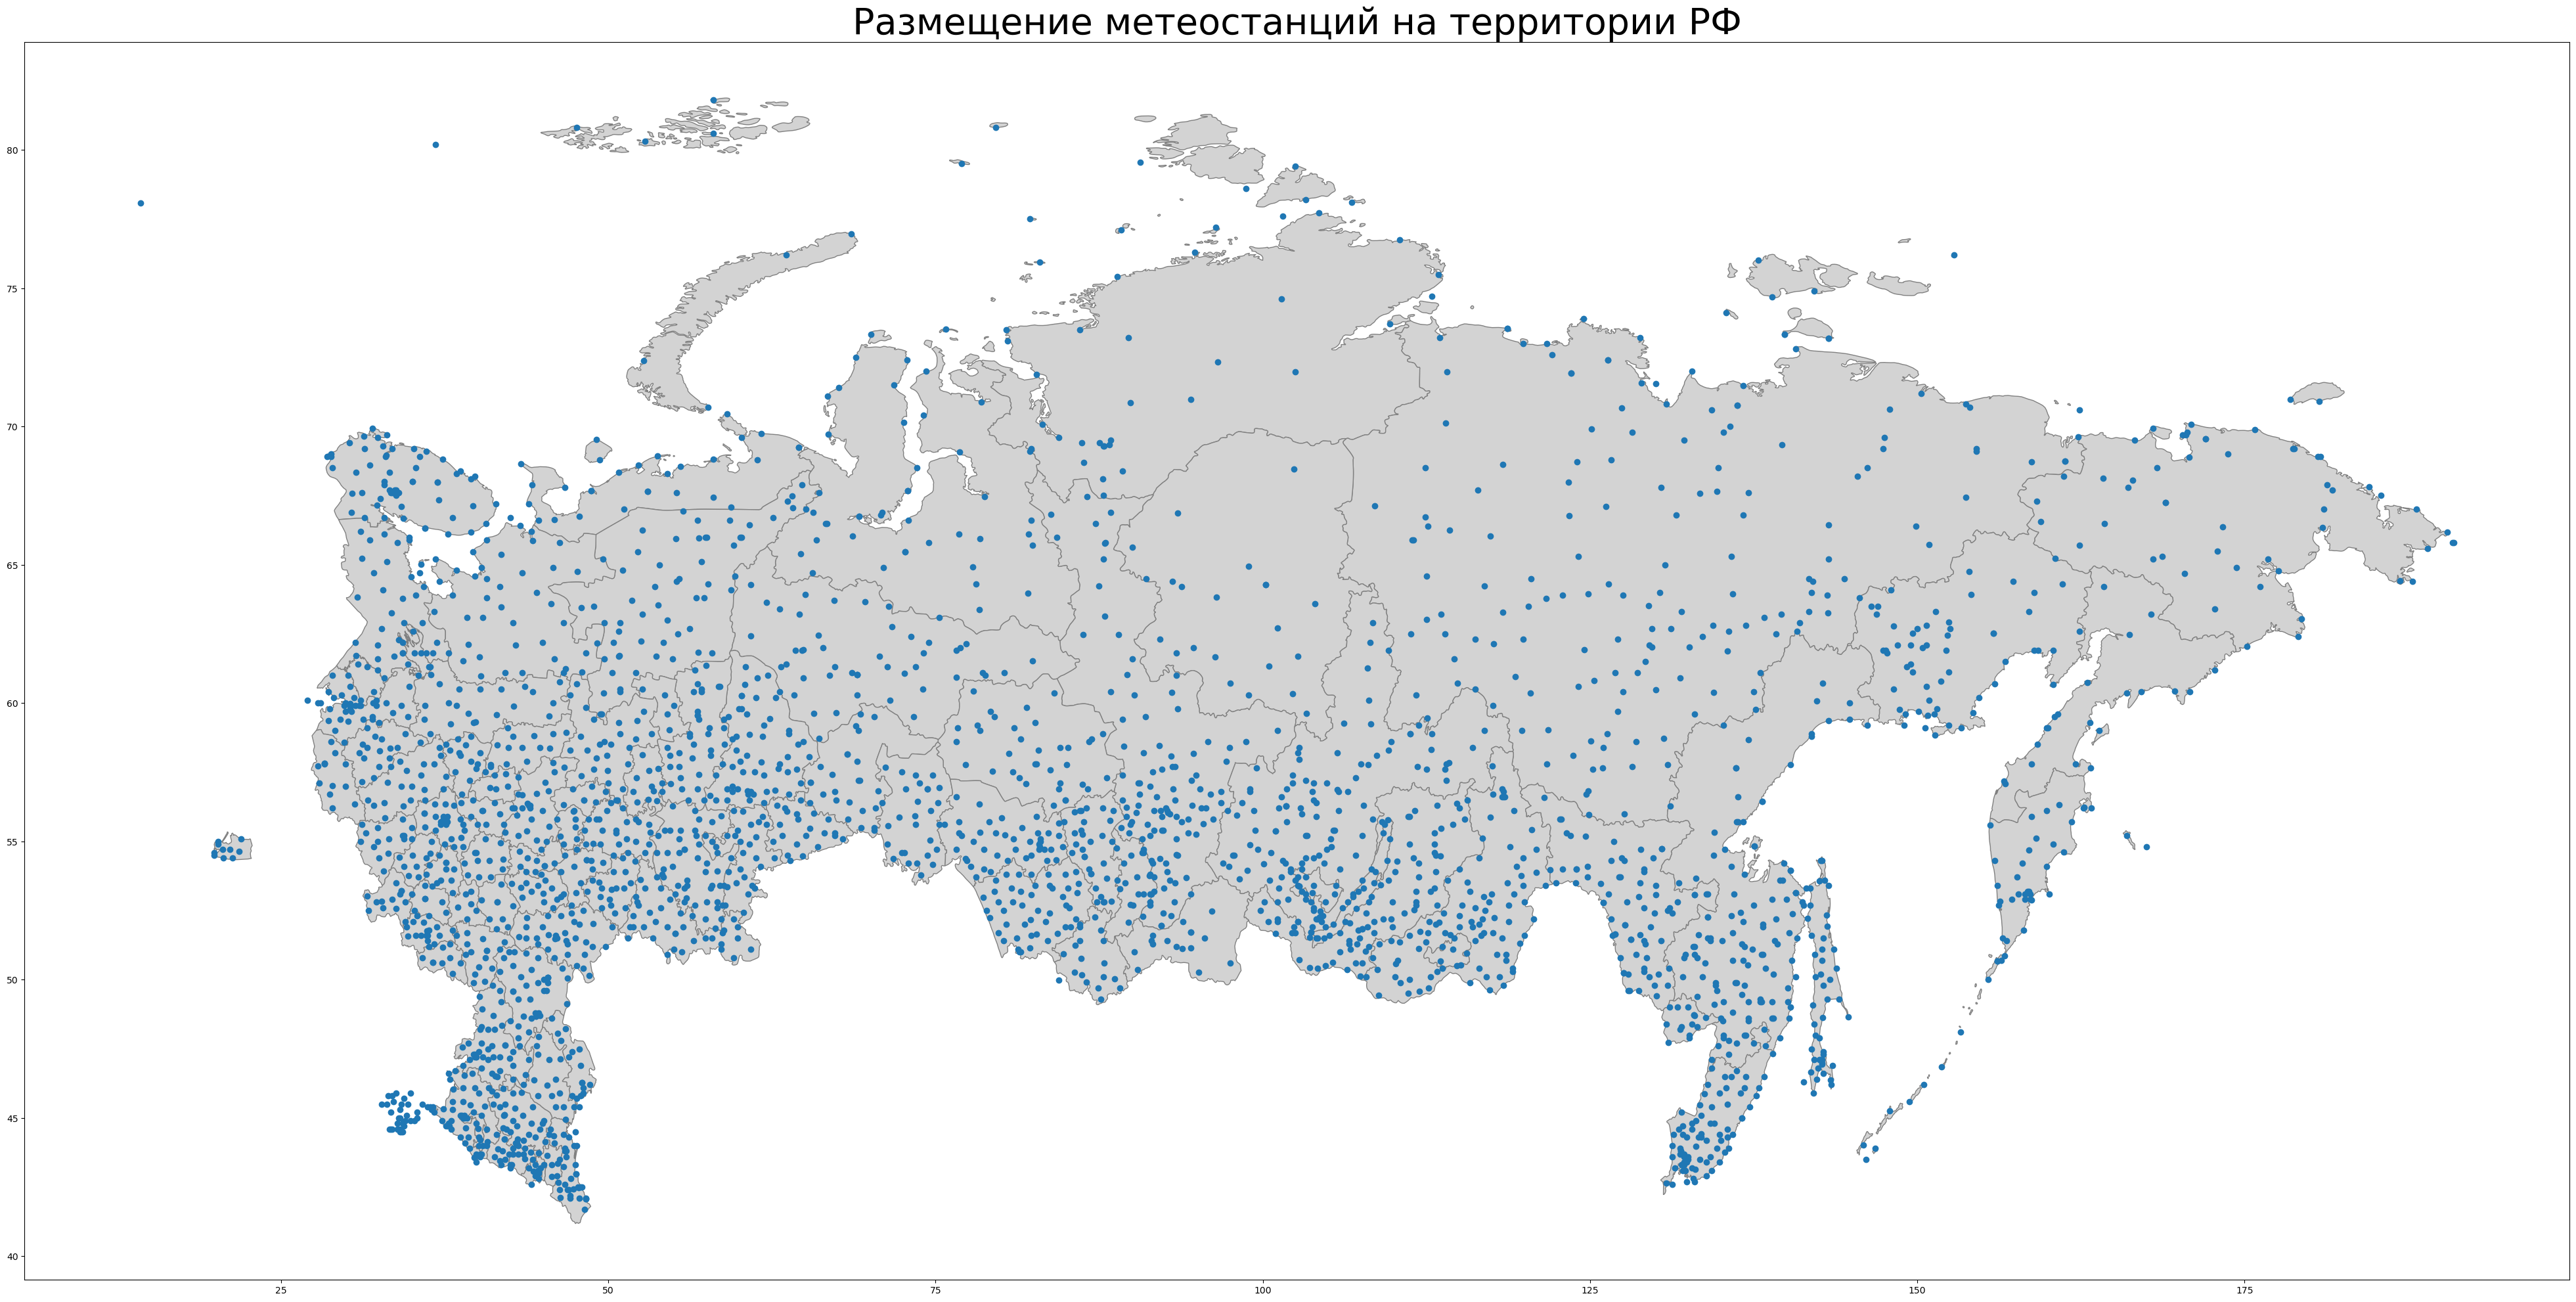

In [5]:
#расположение метеостанций на территории РФ
fig, ax = plt.subplots(figsize = (50, 50))
gdf2.plot(ax=ax, color='lightgrey', edgecolor = 'grey')
gdf1.plot(ax=ax)
ax.set_title('Размещение метеостанций на территории РФ', fontsize = 40)

Text(0.5, 1.0, 'Размещение станций на территории Якутии')

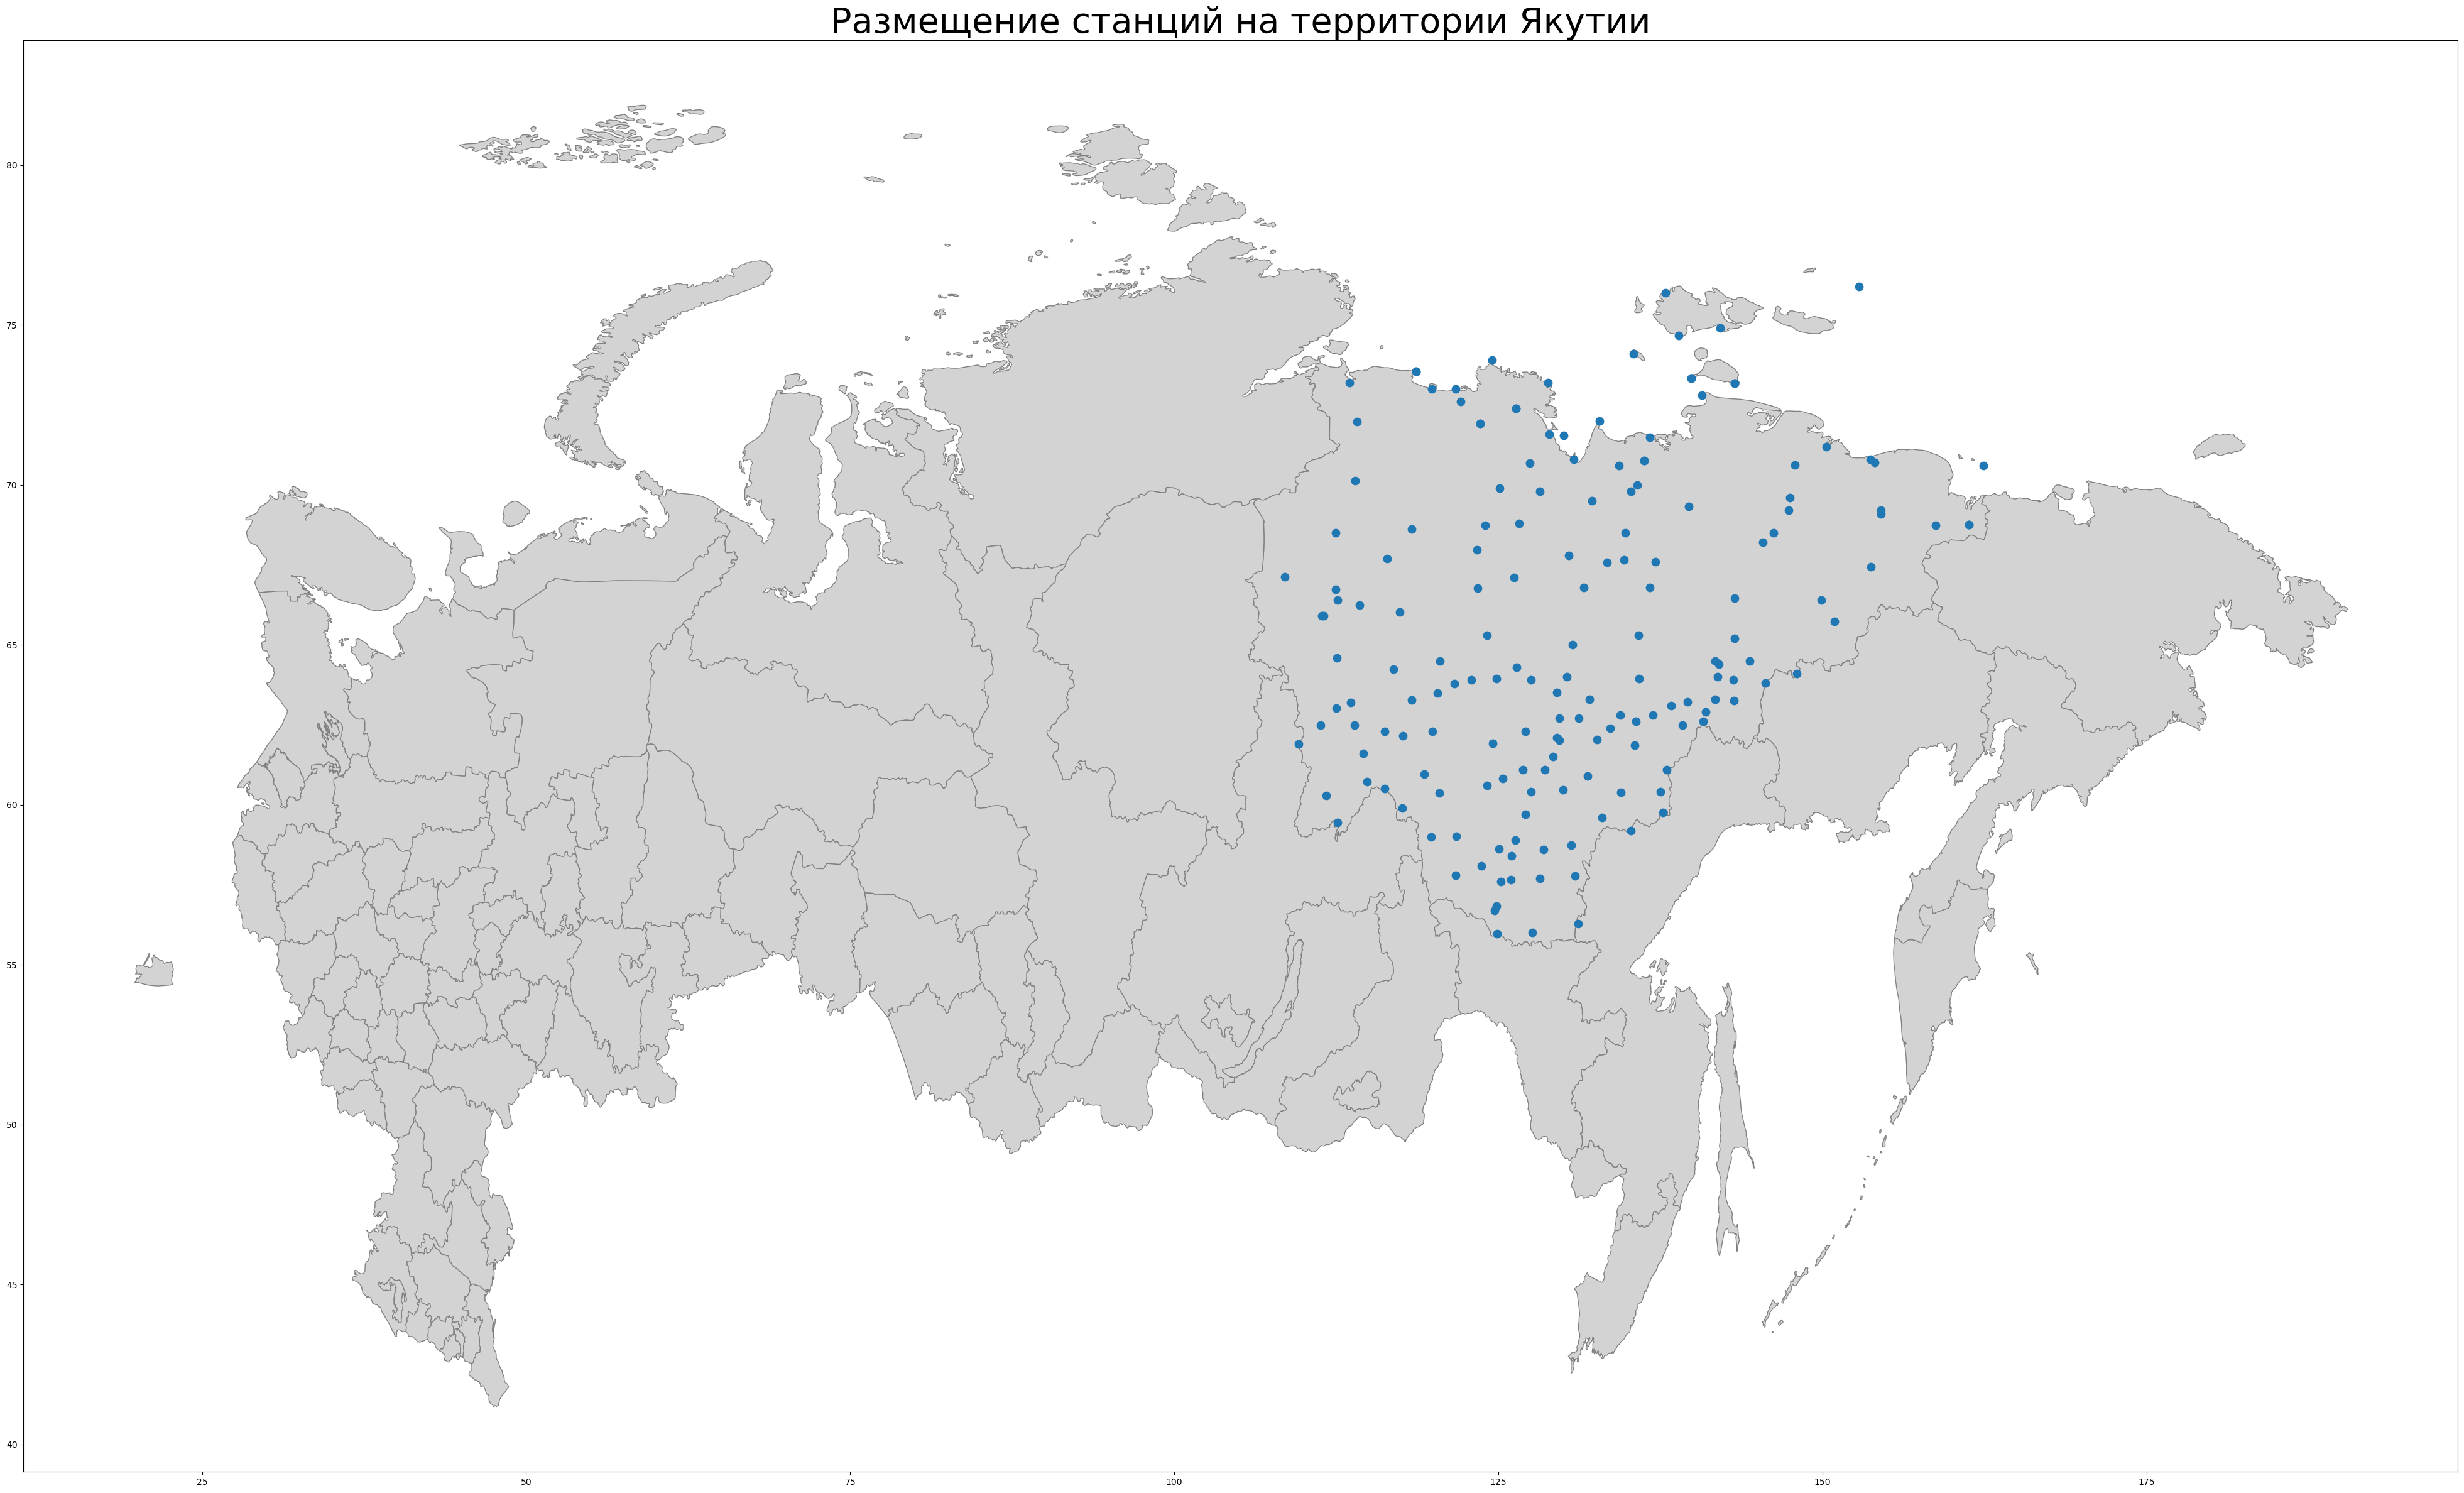

In [6]:
#размещение метеостанций на территории Якутии
fig, ax = plt.subplots(figsize = (50, 50))
gdf2.plot(ax=ax, color='lightgrey', edgecolor = 'grey')
filt_df_region.plot(ax=ax, markersize = 80)
ax.set_title('Размещение станций на территории Якутии', fontsize = 40)

In [7]:
temperature_data_path = "C:\T_mes\T_mes.tab"
temperature_data = pd.read_fwf(temperature_data_path, encoding = 'cp1251')
temperature_data.columns = ['SNUM', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
temperature_data

SNUM  YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP  \
0      20046  1958 -21.1 -25.4 -27.4 -19.9  -9.5  -1.8   1.0  -0.5  -4.0   
1      20046  1959 -28.6 -26.3 -23.8 -16.6  -8.6  -0.9   1.1   0.8  -1.4   
2      20046  1960 -20.5 -32.9 -27.2 -19.9  -7.3  -0.6   1.4  -0.1  -2.2   
3      20046  1961 -27.3 -27.4 -19.4 -16.3 -11.8  -0.8   1.5   1.5  -3.3   
4      20046  1962 -30.1 -29.9 -24.4 -20.1 -12.3  -1.6   0.5  -0.3  -4.1   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
52000  37663  2015   0.4   2.0   4.0   8.2  14.1  20.9  21.3  20.8  18.2   
52001  37663  2016   0.2   4.3   6.8  11.3  14.8  18.0  19.8  22.3  15.2   
52002  37663  2017  -1.0  -1.5   5.3  10.6  15.0  17.3  22.1  22.3  17.9   
52003  37663  2018   0.4   1.5   7.0   9.6  15.9  18.5  24.0  19.2  16.9   
52004  37663  2019   2.4   1.1   4.1   8.8  16.4  21.1  21.1  20.5  14.5   

        OCT   NOV   DEC  
0     -11.6 -19.3 -27.0  
1      -5.2 -10.1 -17.9  
2     -12.4 -21.9 -22.4  
3      -9.6 -19.9 -27.3  
4     -14.0 -11.2 -27.2  
...     ...   ...   ...  
52000   9.5   5.6   0.6  
52001   8.0   4.2  -1.6  
52002  10.2   5.3   3.3  
52003  12.3   4.6   2.0  
52004  12.7   5.1   3.8  

[52005 rows x 14 columns]

In [8]:
pressure_data_path = "C:/PS_mes/Ps_mes.tab"
pressure_data = pd.read_fwf(pressure_data_path, encoding = 'cp1251')
pressure_data.columns = ['SNUM', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
pressure_data

SNUM  YEAR     JAN     FEB     MAR     APR     MAY     JUN     JUL  \
0      20046  1967  1007.0   999.5  1003.3  1000.5  1014.5  1005.5  1009.4   
1      20046  1968  1009.6  1005.6   999.2  1010.5  1010.5  1001.8  1007.4   
2      20046  1969  1023.8  1016.7  1015.3  1015.0  1018.5  1011.8  1013.3   
3      20046  1970  1014.1  1015.6  1021.0  1017.9  1010.6  1001.5  1008.2   
4      20046  1971  1000.5  1016.9  1012.2  1016.1  1007.6  1011.8  1009.4   
...      ...   ...     ...     ...     ...     ...     ...     ...     ...   
32802  37663  2016   898.2   902.6   896.7   898.9   897.7   900.5   899.4   
32803  37663  2017   900.7   902.4   899.0   901.1   898.5   898.9   899.5   
32804  37663  2018   901.2   900.2   896.3   901.9   900.4   898.5   896.4   
32805  37663  2019   897.1   899.9   898.1   899.3   900.1   900.7   897.2   
32806  37663  2020   901.4   898.3   900.8   899.6   899.3   898.5   899.5   

          AUG     SEP     OCT     NOV     DEC  
0      1011.6   999.8   994.6  1003.1     NaN  
1      1006.2  1010.5  1011.3  1018.6  1006.2  
2      1010.8  1009.0  1006.9   997.8  1005.4  
3      1010.3  1011.7  1005.7  1007.9  1003.1  
4      1004.0  1002.9  1001.5   997.2  1006.1  
...       ...     ...     ...     ...     ...  
32802   901.5   900.5   905.3   905.8   901.0  
32803   901.2   903.4   900.9   902.7   902.7  
32804   900.9   902.9   905.3   905.7   900.6  
32805   900.9   902.6   904.0   906.5   900.9  
32806   899.3   903.8   906.0   905.7   905.7  

[32807 rows x 14 columns]

In [9]:
rainfall_data_path = "C:/R_mes/R_mes.tab"
rainfall_data = pd.read_fwf(rainfall_data_path, encoding = 'cp1251')
rainfall_data.columns = ['SNUM', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
rainfall_data

SNUM  YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP  \
0      20046  1967  18.0  39.0  28.0  24.0   8.0  13.0  35.0  38.0  44.0   
1      20046  1968  20.0  25.0   8.0  12.0  10.0  19.0  12.0  59.0  21.0   
2      20046  1969  21.0  26.0  16.0  24.0   7.0   4.0  11.0  23.0  19.0   
3      20046  1970   6.0  31.0  19.0   3.0  25.0  24.0  28.0  35.0  12.0   
4      20046  1971   8.0  27.0  13.0  11.0  31.0   4.0   6.0  31.0  33.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
28275  37663  2016  52.0  17.8  45.4  43.7  61.1  64.2  72.1  12.7  29.4   
28276  37663  2017   6.6   5.3  26.1  34.1  79.0  96.7  12.3   0.0  27.9   
28277  37663  2018  19.5  30.7  61.6  41.3  57.1  49.7  12.4  54.9  12.9   
28278  37663  2019   6.5   9.6  43.2  29.3  49.3  98.6  39.7  12.4  68.8   
28279  37663  2020   8.1  31.7  24.7  41.2  45.2  15.9  13.4  66.4  20.5   

        OCT   NOV   DEC  
0      26.0  36.0  17.0  
1      14.0  16.0  30.0  
2      25.0  20.0  43.0  
3      23.0   4.0  21.0  
4      15.0  17.0  19.0  
...     ...   ...   ...  
28275  46.1  38.4  19.4  
28276  21.7  24.3  14.4  
28277  30.3   2.1  18.8  
28278   1.4  17.7   2.5  
28279  11.8  24.9   5.6  

[28280 rows x 14 columns]

In [10]:
#Найдем геометрию каждого отдельного региона
group_col = 'NAME' 
dissolved_gdf = gdf2.dissolve(by=group_col)
dissolved_gdf= gpd.GeoDataFrame(dissolved_gdf, crs=gdf2.crs).reset_index()

In [11]:
#Посчитаем количество станций в каждом регионе при помощи метода COUNT, затем приведем полученный DataFrame к GeoDataFrame
temp_data = gdf1['OWN2'].value_counts().reset_index()
temp_data.columns = ['NAME', 'COUNT']
merg_data = dissolved_gdf.merge(temp_data, on ='NAME', how = 'left')
dissolved_gdf = gpd.GeoDataFrame(dissolved_gdf, crs=dissolved_gdf.crs)
merg_data = gpd.GeoDataFrame(merg_data, crs=dissolved_gdf.crs).dropna()

region_max_count = merg_data['COUNT'].max()
regions_with_max_stations = merg_data.loc[merg_data['COUNT'] == region_max_count, 'NAME'].unique()
print('Регион с кол-вом станций:{} - {}'.format(regions_with_max_stations, int(region_max_count)))

Регион с кол-вом станций:['Респ. Саха (Якутия)'] - 172


In [12]:
geometry_region = merg_data[merg_data['NAME'] == region]['geometry'].set_crs(epsg=4326)

In [13]:
step = 0.1
lon = np.arange(geometry_region.total_bounds[0], geometry_region.total_bounds[2], step)
lat = np.arange(geometry_region.total_bounds[1], geometry_region.total_bounds[3], step)

# создание сетки точек для новых массивов координат
lon, lat = np.meshgrid(lon, lat)
grid_points = np.array(list(zip(lon.ravel(), lat.ravel())))
grid_points

array([[105.48726654,  55.51265335],
       [105.58726654,  55.51265335],
       [105.68726654,  55.51265335],
       ...,
       [162.68726654,  76.71265335],
       [162.78726654,  76.71265335],
       [162.88726654,  76.71265335]])

In [18]:
def calculating_linear(gdf1):
    
    year_start = int(input('Введите год начала наблюдений: '))
    year_end = int(input('Ведите год конца наблюдений: '))
    
    # фильтруем значения по заданному году и удаляем строки с пропусками
    data_yr_lin = gdf1.loc[(gdf1['YEAR'] >= year_start) & (gdf1['YEAR'] <= year_end)]
    data_yr_lin = data_yr_lin.dropna()
    
    #находим среднее значение показателя за каждый год и
    #заносим его в датафрейм с колонками YEAR и MN_DATA
    #затем строим линейный график
    
    # группировка данных и выделение средних значений за период
    grouped = data_yr_lin.groupby(['SNUM', 'YEAR'])
    data_yr_means_lin = grouped[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
    data_yr_means_lin.reset_index(inplace=True)
    data_yr_means_lin['MN_DATA_PERIOD'] = data_yr_means_lin[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis = 1)
    data_yr_per_lin = data_yr_means_lin[['YEAR', 'MN_DATA_PERIOD', 'SNUM']]
    
    #объединение двух геодатафреймов по айди станции
    merged_data = filt_df_region.merge(data_yr_per_lin, on ='SNUM')
    merged_data = merged_data[['YEAR', 'MN_DATA_PERIOD', 'SNUM']]
    
    grouped = merged_data.groupby('YEAR')
    mean_temp = grouped.mean()
    merged_data_yr = mean_temp.reset_index()[['YEAR', 'MN_DATA_PERIOD']]
    merged_data_yr = merged_data_yr.rename(columns={'MN_DATA_PERIOD':'MN_DATA_YEAR'})
    
    #Создание графика
    x = merged_data_yr['YEAR']
    y = merged_data_yr['MN_DATA_YEAR']
    
    # Вычисление коэффициентов линейной регрессии
    coefficients = np.polyfit(x, y, 1)
    m = coefficients[0]
    b = coefficients[1]

    plt.plot(x, y)
    plt.plot(x, m*x + b, color='red')
    plt.title('Средняя {} за {} год в Якутии'.format(command.lower(), year_start))
    plt.xlabel('Год')
    plt.ylabel('{}'.format(command))
    plt.show()
    
    merged_data_yr.to_csv('data_means.csv', index=False)
    
    return merged_data_yr

In [21]:
def calculating_heatmap(gdf):

    year_start = int(input('Введите год начала наблюдений: '))
    year_end = int(input('Введите год конца наблюдений: '))

    # группировка данных и выделение средних значений
    grouped = gdf.groupby(['SNUM', 'YEAR'])
    data_means = grouped[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
    data_means.reset_index(inplace=True)
    data_means['MN_DATA_PERIOD'] = data_means[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis = 1)
    data_means = data_means[['SNUM', 'MN_DATA_PERIOD', 'YEAR']]
    
    #объединение двух геодатафреймов по айди станции
    merged_data = filt_df_region.merge(data_means, on ='SNUM')
        
    # получение метеостанций, которые пересекаются с границами региона
    data_within_region = merged_data[merged_data.intersects(geometry_region.geometry.iloc[0])]
    data_per = data_within_region.loc[(data_within_region['YEAR'] >= year_start) & (data_within_region['YEAR'] <= year_end)]
    
    temp_min = data_per['MN_DATA_PERIOD'].min()
    temp_max = data_per['MN_DATA_PERIOD'].max()
    
    latitudes = data_per['LAT']
    longitudes = data_per['LON']
    
   
    while year_start <= year_end:
        # фильтруем значения по заданному году и удаляем строки с пропусками
        data_of_year = data_per[data_per['YEAR'] == year_start]
        data_of_year = data_of_year.dropna()
        
        
        # Интерполируем значения температуры
        rbf = Rbf(data_of_year['LAT'], data_of_year['LON'], data_of_year['MN_DATA_PERIOD'], function='inverse', smooth = 0.0009)
        grid_temperatures = rbf(grid_points[:, 1], grid_points[:, 0])#1 0


        heat_map = gpd.GeoDataFrame({
            'MN_DATA': grid_temperatures,
            'geometry': gpd.points_from_xy(grid_points[:, 0], grid_points[:, 1])
        }, crs='EPSG:4326')

        # Установка геометрии 'geometry' в качестве активной геометрии
        heat_map = heat_map.set_geometry('geometry')
        
        # Обрезание тепловой карты границами Якутии
        heat_map_clipped = heat_map.clip(geometry_region.geometry).set_crs(epsg=4326)
        
        sm = ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin = temp_min, vmax = temp_max))
        fig, ax = plt.subplots(figsize=(20,20))
        heat_map_clipped.plot(column = 'MN_DATA', ax=ax, cmap='rainbow', alpha=0.5)
        ax.set_title('Тепловая карта Якутии за {} год'.format(year_start), fontsize = 18)
        geometry_region.plot(ax=ax, facecolor='none', edgecolor='black')
        cbar = fig.colorbar(sm)
        cbar.ax.set_ylabel('{}'.format(command), fontsize = 16)
        year_start += 1
        
        fig.savefig('heatmap1_{}_{}.png'.format(command, year_start))
        
    return print(data_of_year)

Выберите тип данных, которые вы хотите проанализировать::
Температура.
Давление.
Осадки.
Введите тип данных: Температура
Тепловая карта или линейный график?
Тепловая карта
Введите год начала наблюдений: 1970
Введите год конца наблюдений: 1971
       STNNUM            NAME  UGMS   SNUM    LAT     LON  FOLDN    OWN1  \
36    5592491        Нагорный    24  30493  55.97  124.88      0  Россия   
204   5692491         Чульман    24  30393  56.83  124.87      1  Россия   
274   5772591           Канку    24  31102  57.65  125.97      1  Россия   
368   5862541           Алдан    24  31004  58.62  125.03      1  Россия   
454   5873061            Учур    24  31026  58.73  130.62      1  Россия   
535   5902181        Джикимда    24  30089  59.02  121.77      0  Россия   
626   5951261           Витим    24  30054  59.45  112.58      1  Россия   
700   5983771        Югаренок    24  31062  59.77  137.67      0  Россия   
778   6023001        Тегюльтя    24  24967  60.47  130.00      0  Россия 

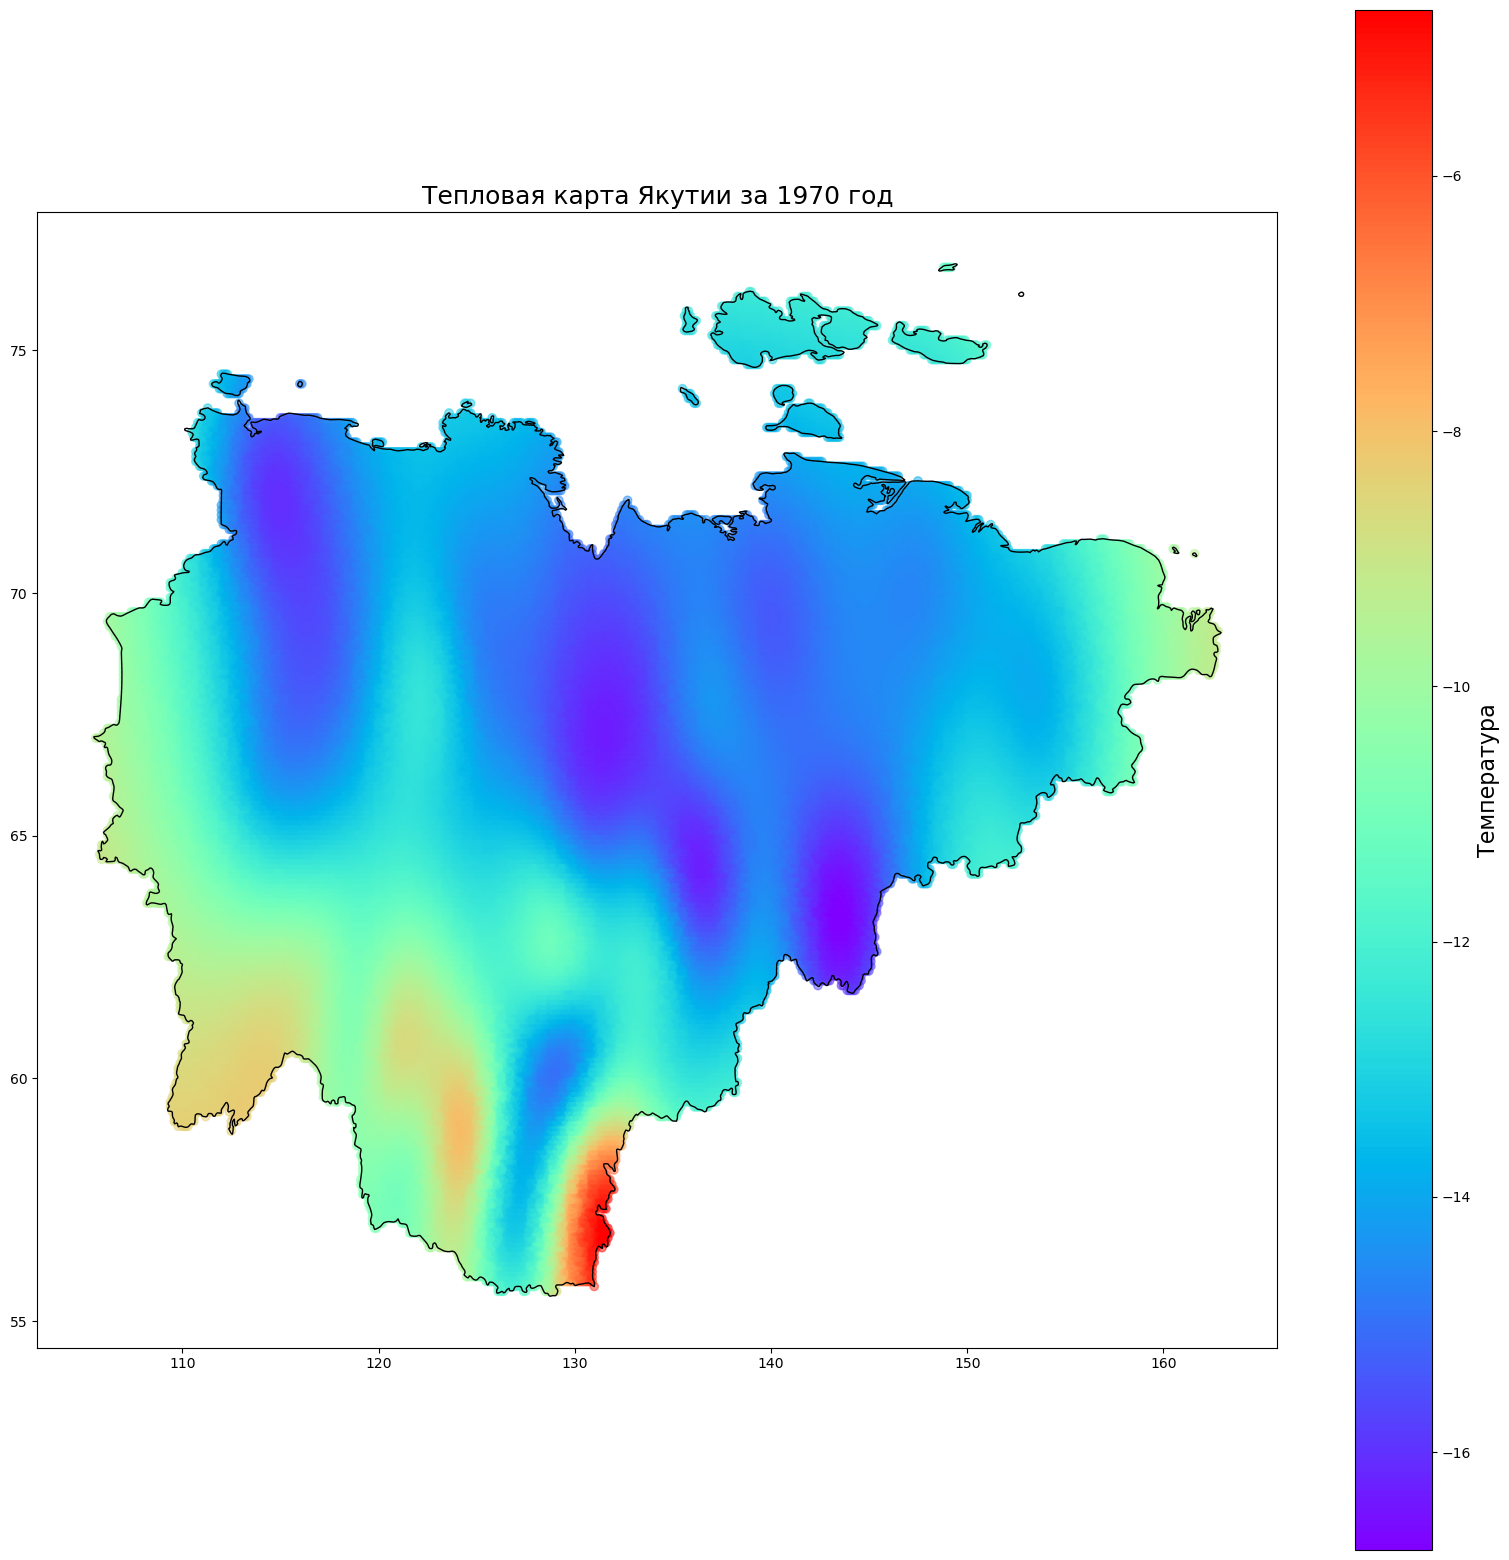

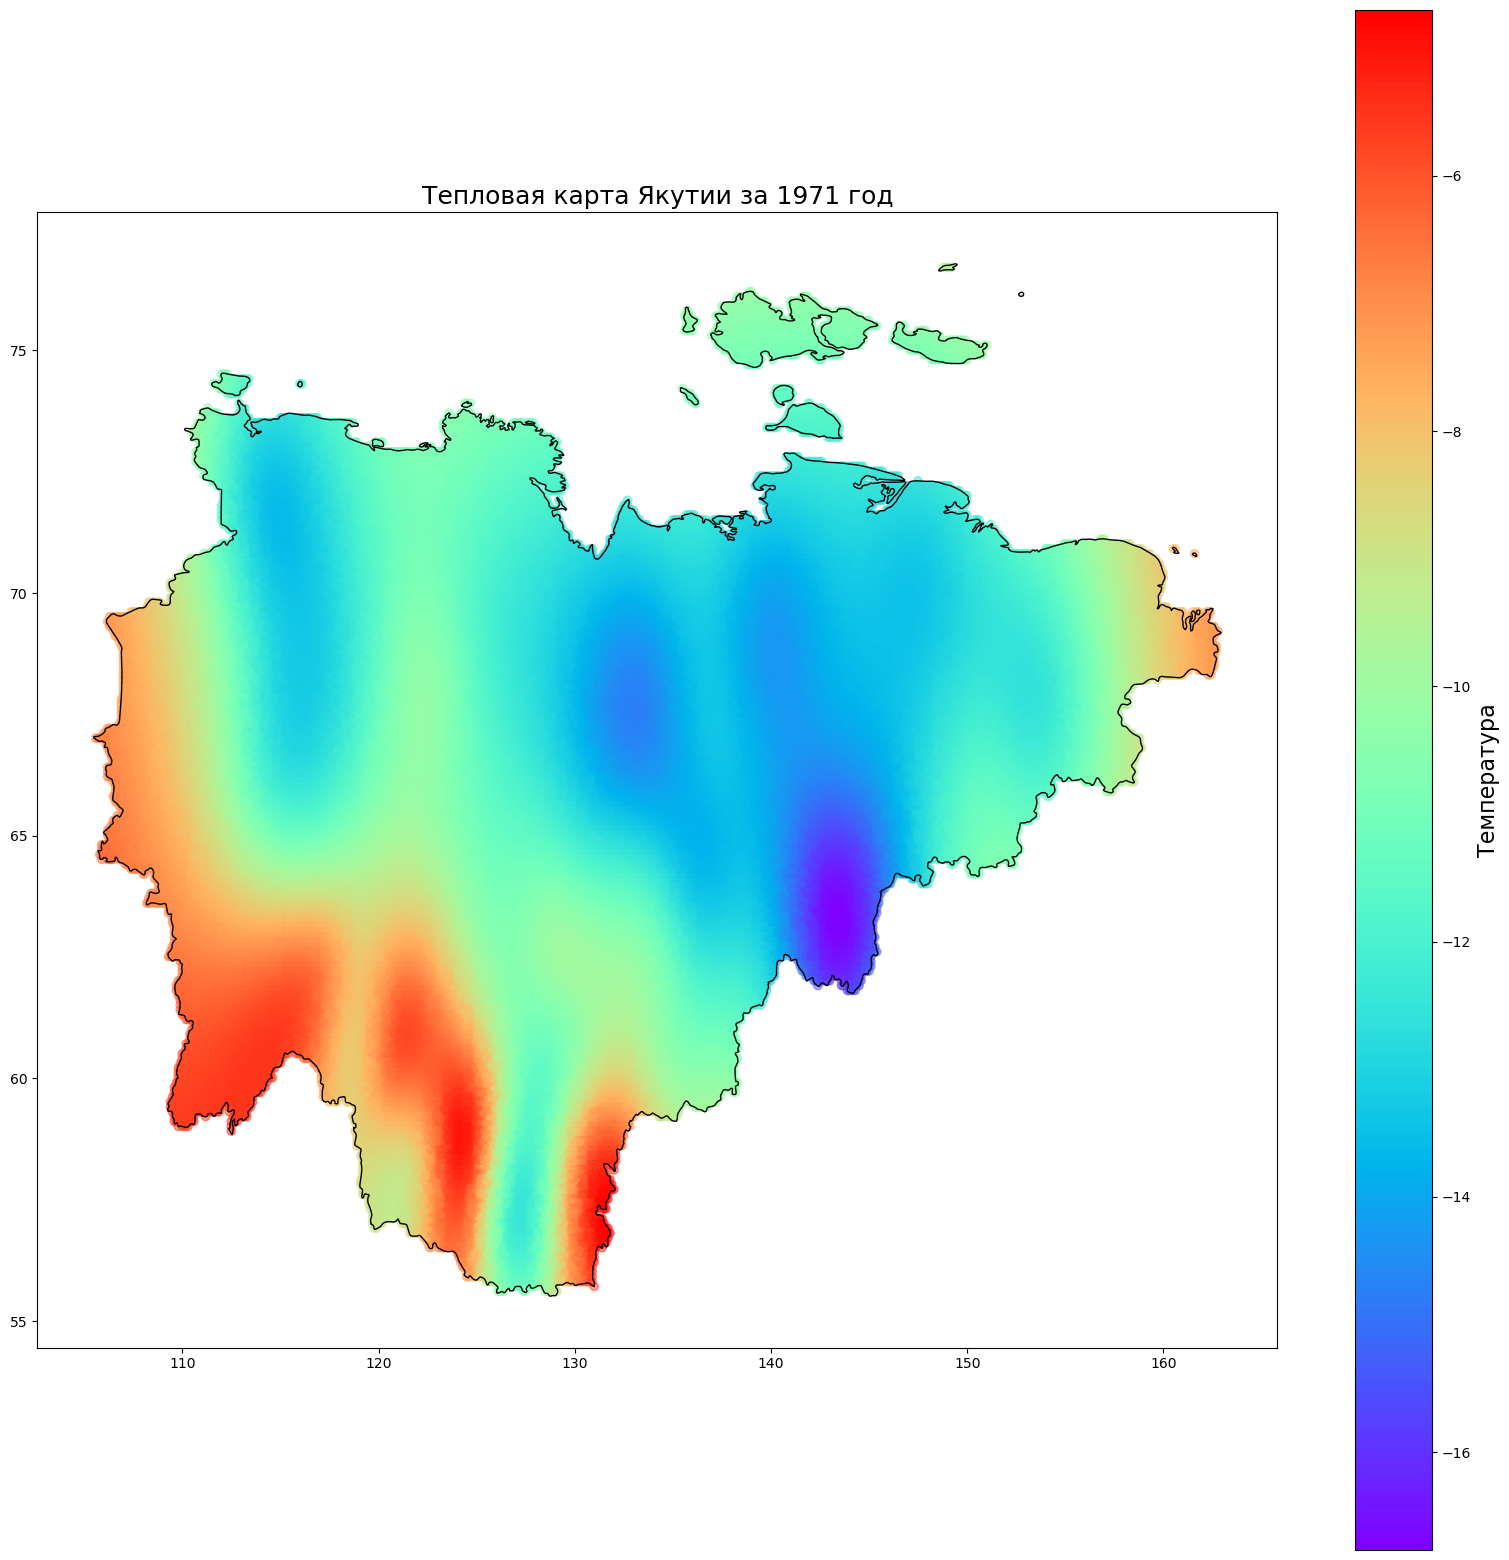

In [22]:
print("Выберите тип данных, которые вы хотите проанализировать::\nТемпература.\nДавление.\nОсадки.")
command = input("Введите тип данных: ")
if command == "":
    print("Пока!")
elif command == "Температура":
    print('Тепловая карта или линейный график?')
    ans = input()
    if ans == 'Тепловая карта':
        calculating_heatmap(temperature_data)
    elif ans == 'Линейный график':
        calculating_linear(temperature_data)
elif command == "Давление":
    print('Тепловая карта или линейный график?')
    ans = input()
    if ans == 'Тепловая карта':
        calculating_heatmap(pressured_data)
    elif ans == 'Линейный график':
        calculating_linear(pressured_data)
elif command == "Осадки":
    print('Тепловая карта или линейный график?')
    ans = input()
    if ans == 'Тепловая карта':
        calculating_heatmap(rainfall_data)
    elif ans == 'Линейный график':
        calculating_linear(rainfall_data)
else:  #default
    print(f"Такого типа данных нет! {command!r}")

Проверим гипотезу о том, что глобальное потепление в северных регионах проистекает быстрее, чем в южных.
      Для этого составим линенйные графики среднегодовой температуры для 2 выбранных регионов, (для теста 
    - Якутия и Краснодарский край). Создадим на основе данных линии тренда, и сравним коэффиценты наклона
     двух линий тренда, чтобы сравнить скорость роста.


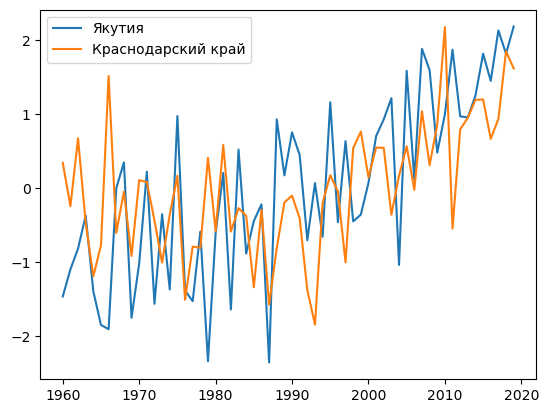

Среднегодовая температура в северном регионе растет быстрее, чем в южном.
 Коэфф. k(север) = 0.05132117286368657
 Коэфф. k(юг) = 0.02496873359883874
Температурный тренд в Якутии: 0.0513 градусов Цельсия в год
Температурный тренд в Краснодарском крае: 0.025 градусов Цельсия в год


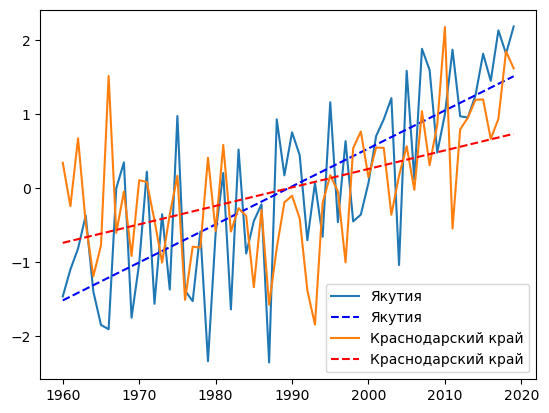

In [30]:
print("""Проверим гипотезу о том, что глобальное потепление в северных регионах проистекает быстрее, чем в южных.
      Для этого составим линенйные графики среднегодовой температуры для 2 выбранных регионов, (для теста 
    - Якутия и Краснодарский край). Создадим на основе данных линии тренда, и сравним коэффиценты наклона
     двух линий тренда, чтобы сравнить скорость роста.""")

year_start = 1960
year_end = 2020
    
#фильтруем значения по заданному году и удаляем строки с пропусками
data_yr_lin = temperature_data.loc[(temperature_data['YEAR'] >= year_start) & (temperature_data['YEAR'] <= year_end)]
data_yr_lin = data_yr_lin.dropna()

#Подготовка данных по Якутии    
region1 = 'Респ. Саха (Якутия)'
filt_df_region = gdf1[gdf1['OWN2'] == region1]
grouped = data_yr_lin.groupby(['SNUM', 'YEAR'])
data_yr_means_lin = grouped[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
data_yr_means_lin.reset_index(inplace=True)
data_yr_means_lin['TEMPERATURE_NORTH'] = data_yr_means_lin[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis = 1)
data_yr_per_lin = data_yr_means_lin[['YEAR', 'TEMPERATURE_NORTH', 'SNUM']]
merged_data = filt_df_region.merge(data_yr_per_lin, on ='SNUM')
merged_data = merged_data[['YEAR', 'TEMPERATURE_NORTH', 'SNUM']]
grouped = merged_data.groupby('YEAR')
mean_temp = grouped.mean()
data_yr_north = mean_temp.reset_index()[['YEAR', 'TEMPERATURE_NORTH']]
sakha_mean_temp = data_yr_north['TEMPERATURE_NORTH'].mean()
data_yr_north['ANOMALY'] = data_yr_north['TEMPERATURE_NORTH'] - sakha_mean_temp

#Подготовка данных по Краснодарскому краю
region2 = 'Краснодарский край'
filt_df_region = gdf1[gdf1['OWN2'] == region2]
grouped = data_yr_lin.groupby(['SNUM', 'YEAR'])
data_yr_means_lin = grouped[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
data_yr_means_lin.reset_index(inplace=True)
data_yr_means_lin['TEMPERATURE_SOUTH'] = data_yr_means_lin[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis = 1)
data_yr_per_lin = data_yr_means_lin[['YEAR', 'TEMPERATURE_SOUTH', 'SNUM']]
merged_data = filt_df_region.merge(data_yr_per_lin, on ='SNUM')
merged_data = merged_data[['YEAR', 'TEMPERATURE_SOUTH', 'SNUM']]
grouped = merged_data.groupby('YEAR')
mean_temp = grouped.mean()
data_yr_south = mean_temp.reset_index()[['YEAR', 'TEMPERATURE_SOUTH']]
kras_mean_temp = data_yr_south['TEMPERATURE_SOUTH'].mean()
data_yr_south['ANOMALY'] = data_yr_south['TEMPERATURE_SOUTH'] - kras_mean_temp


plt.plot(data_yr_north['YEAR'], data_yr_north['ANOMALY'], label='Якутия')
plt.plot(data_yr_south['YEAR'], data_yr_south['ANOMALY'], label='Краснодарский край')
plt.legend()
plt.show()

#Выводим результаты сравнения трендовых компонент
if m_north < m_south:
    print("Среднегодовая температура в южном регионе растет быстрее, чем в северном.\n Коэфф. k(север) = {}\n Коэфф. k(юг) = {}"
            .format(m_north, m_south))
else:
    print("Среднегодовая температура в северном регионе растет быстрее, чем в южном.\n Коэфф. k(север) = {}\n Коэфф. k(юг) = {}"
            .format(m_north, m_south))


# рассчитываем температурный тренд для каждого региона
sakha_trend = linregress(data_yr_north['YEAR'], data_yr_north['ANOMALY'])
kras_trend = linregress(data_yr_south['YEAR'], data_yr_south['ANOMALY'])

# выводим результаты
print('Температурный тренд в Якутии:', round(sakha_trend.slope, 4), 'градусов Цельсия в год')
print('Температурный тренд в Краснодарском крае:', round(kras_trend.slope, 4), 'градусов Цельсия в год')

# строим графики температурного тренда
plt.plot(data_yr_north['YEAR'], data_yr_north['ANOMALY'], label='Якутия')
plt.plot(data_yr_north['YEAR'], sakha_trend.intercept + sakha_trend.slope * data_yr_north['YEAR'], '--', color='blue', label='Якутия')
plt.plot(data_yr_south['YEAR'], data_yr_south['ANOMALY'], label='Краснодарский край')
plt.plot(data_yr_south['YEAR'], kras_trend.intercept + kras_trend.slope * data_yr_south['YEAR'], '--', color='red', label='Краснодарский край')
plt.legend()
plt.show()